# Visualizing Data

Today, we will learn about how we can use Python to visualize quantitative data through histograms, scatter plots, bar plots and pie charts.

TODO:

add better examples for displaying bar charts, add exercises.

# Table of contents
[0. Variable Types](#0.-Variable-Types)

[1. Histograms](#1.-Histograms)

[2. Scatter Plots](#2.-Scatter-Plots)

[3. Bar Plots](#3.-Bar-Plots)

[4. Pie Charts](#4.-Pie-Charts)

Functions in this notebook which you may want to reuse:

**`remove_nan(data)`**

**`select_above_zero(data)`**


Plotting:

**`plot_one_histogram(data, label, xlabel, ylabel, title)`**

**`one_pie_chart(data, label, pie_labels=[])`**

**`one_bar_chart(data, label, bar_labels)`**

**`scatterplot(xdata, ydata, xlabel, ylabel, title)`**


Plotting two figures at once:

**`plot_two_histograms(data1, data2, label1, label2, xlabel, ylabel, title)`**

**`two_bar_charts(data1, data2, label1, label2, bar_labels)`**

**`two_pie_charts(data1, data2, label1, label2, pie_labels=[])`**





# 0. Variable Types

The type of plot to use will depend on whether the data we want to plot consists of continiuous, discrete, or categorical variables. 

**Continuous variables** are numeric variables that can take on any value within its permissible range. Examples of continuous variables are length measurements (e.g. height, width) and time measurements. 

**Discrete variables** are numeric variables that can take on a set of finite values. Examples are coin values (1,5,10,25,50,100 cents), and the number of pokemon in your Pokemon Blue pokedex (integers between 0-151). 

**Categorical variables**, like discrete variables, can only take on a finite number of values, but the values might not have a logical order and they don't have to be numerical. Examples of categorical variables include gender, food preference, and payment method.

We will see that some plots are better than others at displaying information about continuous, discrete, or categorical variables and that sometimes we can use the same plot to visualize more than one type of variable simultaneously. 

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import sys

Let's repeat the steps from yesterday

In [4]:
background = "../../ai4all_data/background.csv"
# Read in data file
data_frame = pd.read_csv(background, low_memory=False)
data_frame = data_frame.set_index('challengeID')

We copied the function we created yesterday for subselecting features to a file called `ff_functions.py`. You can examine it in a text editor.

You can call the functions from the file by reading it in as a library:

In [5]:
import ff_functions as fff

# 1. Histograms

In this section we will learn how to plot histograms. Histograms are diagrams consisting of rectangles (bins) whose height  is proportional to the frequency of a variable  (i.e., number of times the variable appears in the data) and whose  width is equal to the class interval (i.e., the range of values that fall within the bin).

Here, we will plot two histograms. The first histogram will be for the age of the mother when the child was born and the second histogram will be for the age of the father when the child was born.

Try and use the Fragile Families feature lookup website to find the name of the features that contains the mother's and father's age when the child was born. You snould find that the feature names are cm1age and cf1age.

### Question 1.1: 
Check which type (binary, categorical or continuous) these fall into.

### Answer:



Let's use the function we wrote yesterday to subselect a data frame containing only desired variables, and with rows with missing values removed.

In [6]:
features = ["cm1age", "cf1age"]
df = fff.pick_ff_variables(data_frame, features, remove_nans=True, remove_negatives=True)
df.head()

,cm1age,cf1age
challengeID,,
3,23,24
4,22,24
5,19,19
6,18,20
8,21,26


We want to examine the distribution of our data visually. We will use the following function:

In [9]:
'''
Plot two overlapping histograms based on two 1D DataFrames
'''
def plot_two_histograms(data1, data2, label1="", label2="", xlabel="", ylabel="", title=""):
    max_val = int(max(max(data1),max(data2)))
    min_val = int(min(min(data1),min(data2)))
    # the numpy linspace function to create an array of evenly spaced numbers
    bins = np.linspace(min_val, max_val, min(max_val-min_val,100))
    # Let's create the matplotlib figure where we will plots the histograms.
    fig = plt.figure(figsize=(7,7))
    # Plot the histograms. We use pyplot's hist function and 
    plt.hist(data1, bins, alpha=0.5, label=label1)
    plt.hist(data2, bins, alpha=0.5, label=label2)
    # Label the plot.
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # Plot a legend so that we can match the color of the histogram to the data.
    plt.legend(loc="upper right")
    # Show the plot
    plt.show()

[ 15.          16.02857143  17.05714286  18.08571429  19.11428571
  20.14285714  21.17142857  22.2         23.22857143  24.25714286
  25.28571429  26.31428571  27.34285714  28.37142857  29.4         30.42857143
  31.45714286  32.48571429  33.51428571  34.54285714  35.57142857  36.6
  37.62857143  38.65714286  39.68571429  40.71428571  41.74285714
  42.77142857  43.8         44.82857143  45.85714286  46.88571429
  47.91428571  48.94285714  49.97142857  51.        ]


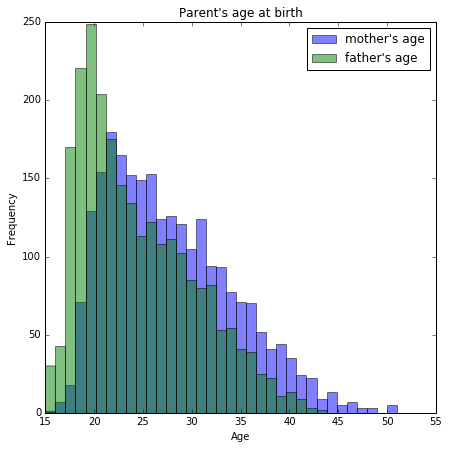

In [8]:
plot_two_histograms(df.cf1age, df.cm1age, label1="mother's age", label2="father's age", \
                    xlabel="Age", ylabel="Frequency", title = "Parent's age at birth")

## Exercise 1.1:
Find a variable corresponding to household income and plot its histogram

You can use the following function:

In [ ]:
'''
Plot a histogram based on a 1D DataFrame
'''
def plot_one_histogram(data, label="", xlabel="", ylabel="", title=""):
    max_val = int(max(data))
    min_val = int(min(data))
    bins = np.linspace(min_val, max_val, min(max_val-min_val,100))
    fig = plt.figure(figsize=(7,7))
    plt.hist(data, bins, alpha=0.5, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

In [12]:
# select variable
###m5j1

In [13]:
# remove NaN

# Remove below zero


In [14]:
# plot


# 2. Scatter Plots

In this section we will learn how to use scatter plots. Scatter plots are graphs in which the values of two variables are  plotted along two axes, the pattern of the resulting points revealing any correlation present.

We will use the household income in Year 1 and household income in Year 9 to compare spread and the changes in income across families in the study.

We will use the features f2l1 and m5j1 from the data.

### Question 2.1: 
How do you expect a family's income to change across 8 years? Would you expect families' income to grow, drop or stay the same?

### Answer:

In [15]:
'''
This function takes in two arrays of equal length (xdata, ydata)
and plots them against each other in a scatterplot
'''
def scatterplot(xdata, ydata, xlabel="", ylabel="", title=""):
    fig = plt.figure(figsize=(7,7))
    data_max = max(max(xdata), max(ydata))
    plt.scatter(xdata, ydata)
    #plt.plot([0,data_max],[0,data_max])
    plt.xlim(0,max(xdata))
    plt.ylim(0,max(ydata))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    fig.show()

In [43]:
income_yr1_9 = fff.pick_ff_variables(data_frame, ["f2l1", "m5j1"], remove_nans=True, remove_negatives=True)
income_yr1_9.head()

,f2l1,m5j1
challengeID,,
4,31037.239985,52330.093001
6,37215.440460,117744.847922
9,23437.652319,51248.022497
11,19508.401102,26853.171229
13,26212.061488,9679.511515


//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


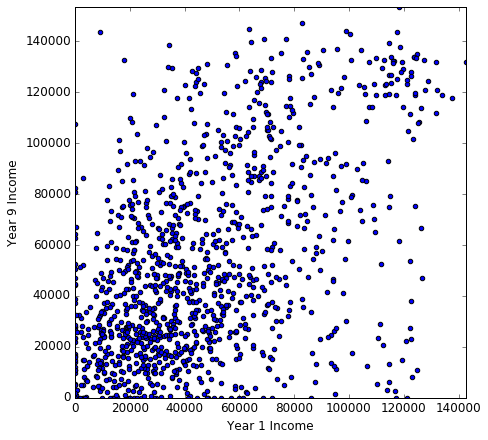

In [44]:
scatterplot(income_yr1_9.f2l1, income_yr1_9.m5j1, xlabel = "Year 1 Income", ylabel = "Year 9 Income")

The points on the blue diagonal line represent families whose income didn't change across the 8 years. We see that there were many families whose income dropped as well as many families whose income grew or stayed the same.

Now, let's look at scatterplot of incomes in Year 1 and Year 3. 

### Question 2.2: 
How different do you expect this scatterplot to be?

### Answer:

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


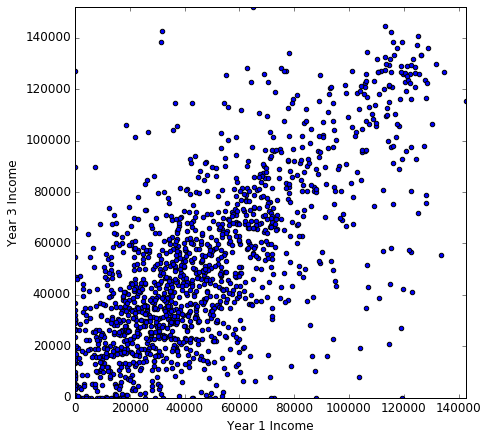

In [46]:
income_yr1_3 = fff.pick_ff_variables(data_frame, ["f2l1", "f3l1"], remove_nans=True, remove_negatives=True)

scatterplot(income_yr1_3.f2l1, income_yr1_3.f3l1, xlabel = "Year 1 Income", ylabel = "Year 3 Income")

### Question 2.3: Is what you we consistent with the expectations?

### Answer:

## Exercise 2.1
Generate a scatterplot where you display the amount of time teachers think homework would take per night (t5e12) and Percentage of children that complete all homework in typical week (t5e12)

### Question 2.4: 
This scatterplot looks different. Why? What would be a better way to display those variables?

### Answer:

## Visualizing Categorical (Discrete) Variables

# 3. Bar Plots

Another great way to visualize categorical variables is to use bar plots. Below, we plot the level of education of the parents when the child was born on a bar plot together with whether they were married or not. To do this, we use the feature cf1marm, which is a binary variable representing whether the couple was married or not at the time the child was born.

These are categorical variables, meaning that the variable can take on one of a limited, and usually fixed number of possible values, assigning each entry in the data to a particular group.

We use the cm1edu and cf1edu features from the data which contain encoded information about the level of education of the parents when the child was born. The entries in cf1edu and cm1edu are either 1,2,3 or 4:

1: 'Less than High School',

2: 'High School or equivalent',

3: 'Some college or technical degree',

4: 'college or graduate degree'

In [48]:
married = fff.pick_ff_variables(data_frame, ["cf1marm"], remove_nans=True, remove_negatives=True)

Below we use a pie chart to
visualize the level of education of the parents when the child was born. 

These are categorical variables, meaning that the variable can take on one of a limited, and usually fixed number of possible values, assigning each entry in the data to a particular group.

We use the cm1edu and cf1edu features from the data which contain encoded information about the level of education of the parents when the child was born. The entries in cf1edu and cm1edu are either 1,2,3 or 4:

1: 'Less than High School',

2: 'High School or equivalent',

3: 'Some college or technical degree',

4: 'college or graduate degree'

In [49]:
# Parents educational level at birth
mom_edu = data_frame.cm1edu # level of education of mother at birth
dad_edu = data_frame.cf1edu # level of education of father at birth

mom_edu = remove_nan(mom_edu)
mom_edu = select_above_zero(mom_edu)

dad_edu = remove_nan(dad_edu)
dad_edu = select_above_zero(dad_edu)
#  How many in each category? Use the len function to obtain the length of an array.
mom_edu_1 = len(mom_edu[mom_edu==1])
mom_edu_2 = len(mom_edu[mom_edu==2])
mom_edu_3 = len(mom_edu[mom_edu==3])
mom_edu_4 = len(mom_edu[mom_edu==4])

dad_edu_1 = len(dad_edu[dad_edu==1])
dad_edu_2 = len(dad_edu[dad_edu==2])
dad_edu_3 = len(dad_edu[dad_edu==3])
dad_edu_4 = len(dad_edu[dad_edu==4])

In [50]:
# Bar chart
mom_sizes = [mom_edu_1, mom_edu_2, mom_edu_3, mom_edu_4]
dad_sizes = [dad_edu_1, dad_edu_2, dad_edu_3, dad_edu_4]

In [51]:
def two_bar_charts(data1, data2, label1="", label2="", bar_labels=[]):
    labels = np.arange(4)
    fig = plt.figure(figsize=(10,5))
    ax1 = plt.subplot(121) # 121 means we want 1 row, 2 columns, and that we want to plot on the first of these 2 subplots
    plt.title(label1)
    ax1.bar(labels, data1)
    ax2 = plt.subplot(122) # 122 means we want the 2nd plot of the 1 row, 2 columns figure.
    plt.title(label2)
    ax2.bar(labels, data2)
    ax1.set_xticks(labels+0.4)
    ax1.set_xticklabels(bar_labels)
    ax2.set_xticks(labels+0.4)
    ax2.set_xticklabels(bar_labels)
    plt.show()

In [52]:
def one_bar_chart(data, label="", bar_labels=[]):
    labels = np.arange(4)
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(121) # 121 means we want 1 row, 2 columns, and that we want to plot on the first of these 2 subplots
    plt.title(label)
    ax.bar(labels, data)
    ax.set_xticks(labels+0.4)
    ax.set_xticklabels(bar_labels)
    plt.show()

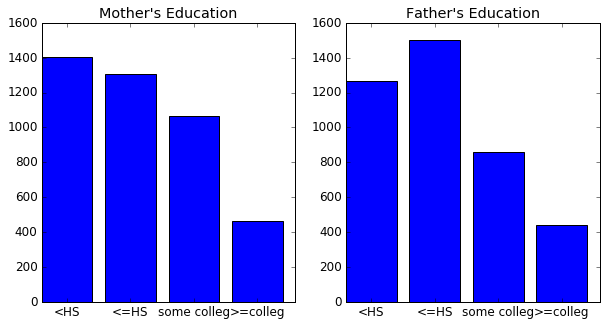

In [53]:
two_bar_charts(mom_sizes, dad_sizes, label1 = "Mother's Education", label2 = "Father's Education", bar_labels=['<HS','<=HS','some colleg','>=colleg'])

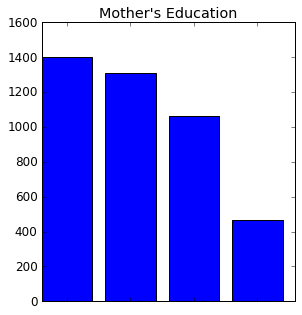

In [54]:
one_bar_chart(mom_sizes, label = "Mother's Education")

# 4. Pie Charts

You have probably seen and used pie charts before. They are great for visualizing proportions.

You can similarly display this data in a pie chart, where the slices will be ordered and plotted counter-clockwise:

In [55]:
def one_pie_chart(data, label, pie_labels=[]):
    explode = (0, 0, 0, 0.1)
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(121)
    plt.title(label)
    ax1.pie(data, explode=explode, labels=pie_labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

In [56]:
def two_pie_charts(data1, data2, label1, label2, pie_labels=[]):
    explode = (0, 0, 0, 0.1)
    plt.rcParams.update({'font.size': 22})
    fig = plt.figure(figsize=(30,10))
    ax1 = plt.subplot(121)
    plt.title("Mother's Education")
    ax1.pie(data1, explode=explode, labels=pie_labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')
    ax2 = plt.subplot(122)
    plt.title("Father's Education")
    ax2.pie(data2, explode=explode, labels=pie_labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')
    plt.show()

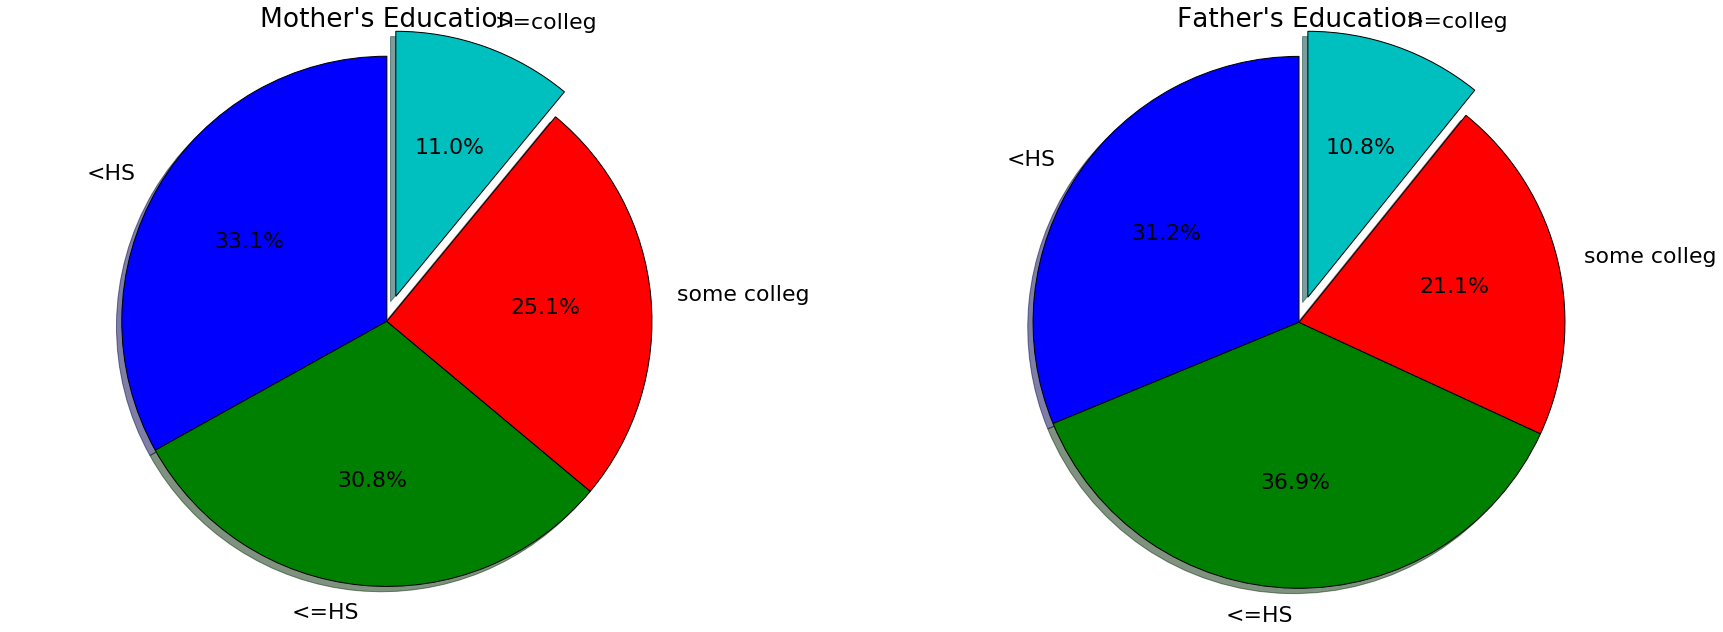

In [57]:
two_pie_charts(mom_sizes, dad_sizes, label1="Mother's Education", label2="Father's Education", pie_labels=['<HS','<=HS','some colleg','>=colleg'])

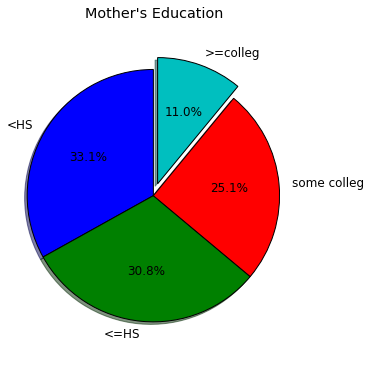

In [29]:
one_pie_chart(mom_sizes, label="Mother's Education", pie_labels=['<HS','<=HS','some colleg','>=colleg'])

# Exercises

Below, there are two exercises that will help you get more experience programming in Python and using maplotlib to visualize data.

In [30]:
# EXERCISE: make a scatter plot like the one above, but make the points corresponding to couples who are not married
# but living together (cohabiting) be green stars.

# Tip: Remember to remove the same rows that we removed NaNs from cm1age and cf1age for any new feature that you want to use.

In [31]:
# EXERCISE: make the size of markers in the previous plot reflect for how many years the mother knew the father
# before getting pregnant.  
